In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
d1x = np.array(sorted([163, 12, 23, 311, 44, 75, 82, 122, 219, 247, 5, 251, 118, 1774, 1]))
d2x = np.array(sorted([440, 2946, 227, 143, 550, 32, 293, 137, 157, 151, 4, 14, 174, 1797, 2776]))
d3x = np.array(sorted([3026, 2053, 1538, 242, 239, 238, 6, 162, 1069, 50, 59, 602, 780, 1633, 1805]))
# d4x = np.array(sorted([2165, 2918, 1198, 1655, 4449, 4795, 3702, 4417, 3698, 3117, 3556, 2362, 2160, 4322, 2364]))

In [3]:
d1y = np.append(d1x[1:], d1x[0])
d2y = np.append(d2x[1:], d2x[0])
d3y = np.append(d3x[1:], d3x[0])
# d4y = np.append(d4x[1:], d4x[0])

In [4]:
d1x = d1x.reshape((15, 1, 1))
d2x = d2x.reshape((15, 1, 1))
d3x = d3x.reshape((15, 1, 1))
# d4x = d4x.reshape((15, 1, 1))
dx = [d1x, d2x, d3x]

In [5]:
dy = np.array([d1y, d2y, d3y])

In [6]:
from keras.models import Sequential
from keras.layers import GRU, Dense

Using TensorFlow backend.


In [8]:
batch_shape = (1, dx[0].shape[1], dx[0].shape[1])

In [9]:
model = Sequential()
model.add(GRU(128, batch_input_shape=batch_shape, stateful=True, return_sequences=True))
model.add(GRU(512, stateful=True, return_sequences=True))
model.add(GRU(1024, stateful=True))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (1, 1, 128)               49920     
_________________________________________________________________
gru_2 (GRU)                  (1, 1, 512)               984576    
_________________________________________________________________
gru_3 (GRU)                  (1, 1024)                 4721664   
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    1025      
Total params: 5,757,185.0
Trainable params: 5,757,185
Non-trainable params: 0.0
_________________________________________________________________


In [10]:
loss_min = 10e20
loss_history = pd.DataFrame(columns=['d1x', 'd2x', 'd3x'])

In [12]:
epochs = 500
print_at = 5
cur_loss = [0] * 3

loss_history = pd.read_csv("../models/loss_model1.csv", index_col=0)

from keras.models import load_model
model = load_model("../models/03d_mlg")

In [13]:
for i in range(epochs + 1):
    for n in range(3):
        his = model.fit(dx[n], dy[n], batch_size=1, epochs=1, verbose=0, shuffle=False)
        model.reset_states()
        cur_loss[n] = his.history['loss'][0]
    loss_history.loc[len(loss_history)] = cur_loss
    if sum(cur_loss) < loss_min:
        loss_min = sum(cur_loss)
        model.save("../models/03d_mlg")
    if i % print_at == 0:
        print("Epoch: {}, loss_min: {}, loss: {}".format(i, loss_min, sum(cur_loss)))

Epoch: 0, loss_min: 2916565.875134778, loss: 2916565.875134778
Epoch: 5, loss_min: 2714036.6546793925, loss: 2714036.6546793925
Epoch: 10, loss_min: 2551713.2191957687, loss: 2551713.2191957687


KeyboardInterrupt: 

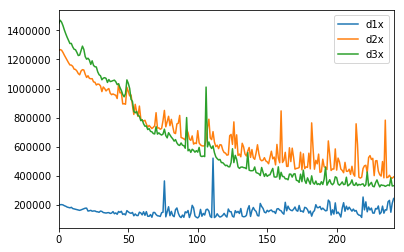

In [21]:
plt.clf()
loss_history.plot()

In [23]:
loss_history.to_csv("../models/loss_model1.csv")